<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [47]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()
df.columns
df = df[['Pu238', 'Pu239', 'Pu240', 'Pu241']]

###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [48]:
X = df[['Pu239', 'Pu240']]

In [49]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

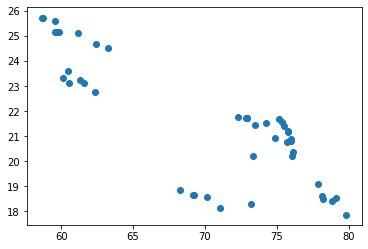

In [50]:
plt.scatter(X.Pu239, X.Pu240)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [51]:
km = KMeans(n_clusters=3)
km.fit(X_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [52]:
km.labels_

array([0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0,
       1])

In [53]:
df['clusters'] = km.labels_

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [54]:
df.groupby('clusters').mean()

,Pu238,Pu239,Pu240,Pu241
clusters,,,,
0,0.234778,74.686722,21.166611,2.864500
1,1.383067,60.633933,24.387533,8.666467
2,0.625083,74.432583,18.516250,4.857000


In [60]:
centroids = pd.DataFrame(

    ss.inverse_transform(km.cluster_centers_), columns =['Pu239','Pu240']


)

<Figure size 504x504 with 0 Axes>

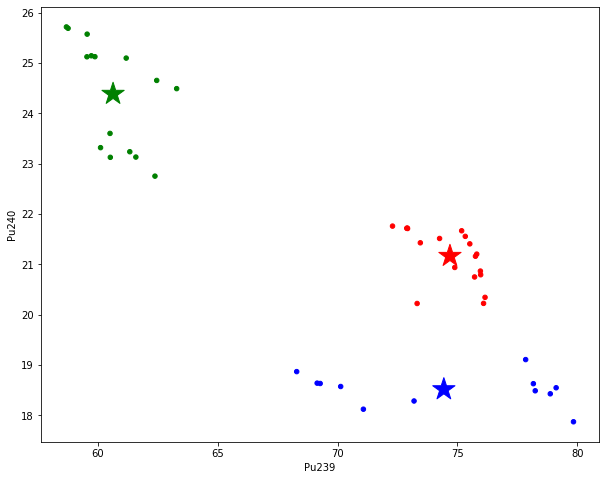

In [62]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['clusters'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
);

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [65]:
km.fit(X)

df['clusters_noss'] = km.labels_


centroids_noss = pd.DataFrame(

    km.cluster_centers_, columns =['Pu239','Pu240']


)

<Figure size 504x504 with 0 Axes>

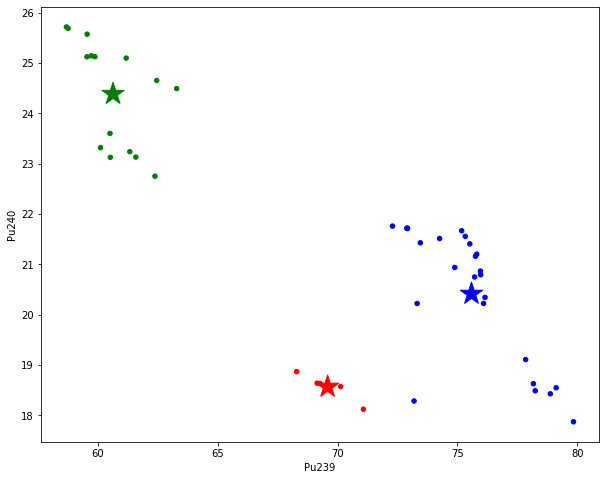

In [66]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['clusters_noss'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
);

centroids_noss.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [67]:
scores = []

for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(X_ss)
    inertia = km.inertia_
    sil = silhouette_score(X_ss, km.labels_)
    scores.append((k, inertia, sil))

In [68]:
score_df = pd.DataFrame(scores, columns=['k', 'inertia', 'silhouette'])

Text(0.5, 1.0, 'Silhouette Score over k')

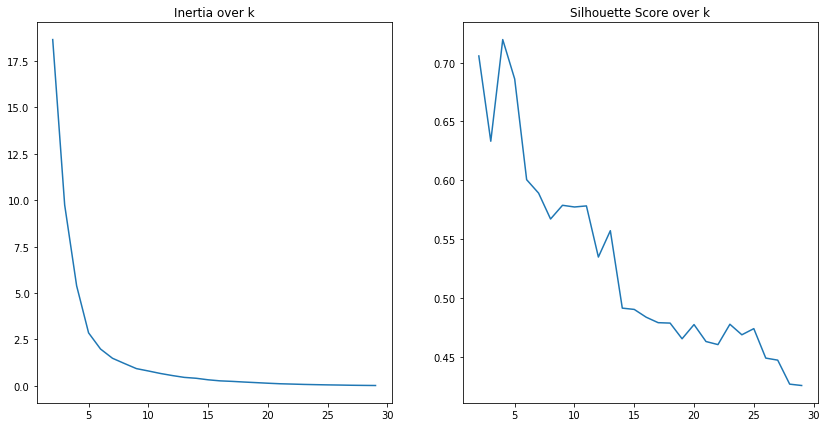

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')